In [18]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits

In [19]:
dat=fits.open('hlsp_candels_hst_wfc3_goodsn-barro19_multi_v1_emission-line-grism-g141-cat.fits')

In [22]:
dat.info()

Filename: hlsp_candels_hst_wfc3_goodsn-barro19_multi_v1_emission-line-grism-g141-cat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    214   35445R x 103C   [K, 22A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [21]:
dat[1].header

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  838 / length of dimension 1                          
NAXIS2  =                35445 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  103 / number of table fields                         
TTYPE1  = 'ID      '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'grism_id'                                                            
TFORM2  = '22A     '                                                            
TTYPE3  = 'h_mag   '        

In [23]:
data=dat[1].data

In [25]:
data['Lya_FLUX']

array([-99., -99., -99., ..., -99., -99., -99.])

In [103]:
OIII=data['OIII_EQW']
Halpha=data['Ha_EQW']
Hbeta=data['Hb_EQW']
SII=data['SII_EQW']
OI=data['OI_EQW']
Hd=data['Hd_EQW']

In [109]:
samp=np.where((OIII>0)&(Halpha>0)&(Hbeta>0)&(SII>0))[0]
samp2=np.where((OIII>0)&(Halpha>0)&(Hbeta>0)&(OI>0))[0]
samp3=np.where((OIII>0)&(Halpha>0)&(Hbeta>0)&(OI>0)&(Hd>0))[0]

In [110]:
len(samp),len(samp2),len(samp3)

(396, 326, 6)

In [50]:
OIII[samp]

array([3.25300e+01, 7.37900e+01, 2.25000e+01, 4.01900e+01, 4.17600e+01,
       1.79720e+02, 2.21400e+01, 4.12680e+02, 9.32440e+02, 4.39430e+02,
       8.66200e+02, 1.19360e+02, 1.54400e+01, 1.06410e+03, 3.10500e+01,
       2.05730e+02, 3.63220e+02, 8.40600e+01, 2.43520e+02, 3.99400e+02,
       4.75800e+01, 3.16000e+01, 1.01500e+01, 7.97200e+01, 4.16740e+02,
       2.89000e+00, 2.28070e+02, 8.78000e+01, 9.65350e+02, 5.40600e+02,
       3.82780e+02, 1.01080e+03, 1.12710e+02, 7.86700e+01, 1.65030e+02,
       4.56150e+02, 1.97240e+02, 1.94580e+02, 7.43170e+02, 1.02000e+02,
       3.68720e+02, 1.06280e+02, 1.02560e+02, 9.60000e+00, 1.16400e+02,
       3.74100e+01, 2.16879e+03, 1.33580e+02, 2.09020e+02, 3.30800e+01,
       9.92200e+01, 6.42880e+02, 3.07910e+02, 4.83660e+02, 2.37700e+01,
       6.99000e+01, 1.52060e+02, 8.03000e+00, 3.84790e+02, 2.13900e+02,
       2.34770e+02, 2.77190e+02, 3.77017e+03, 5.22870e+02, 7.97100e+01,
       4.54980e+02, 1.54470e+02, 5.12400e+01, 3.25140e+02, 3.597

In [51]:
OHb=OIII[samp]/Hbeta[samp]
SHa=SII[samp]/Halpha[samp]
OiHa=OI[samp2]/Halpha[samp2]
OHb2=OIII[samp2]/Hbeta[samp2]

In [85]:
def agndefSII(x): 
    return 0.72/(x-0.32)+1.3
def agndefOI(x):
    return 0.73/(x+0.59)+1.33

In [98]:
xxxx=np.linspace(-4,0.319999999,1000)
xxxx2=np.linspace(-4,-0.590000001,1000)

In [99]:
AGNSII=[]
for i, idx in enumerate(samp):
    if agndefSII(np.log10(SHa[i]))<np.log10(OHb[i]):
        AGNSII.append(i)
    elif np.log10(SHa[i])>0.32:
        AGNSII.append(i)
AGNOI=[]
for i, idx in enumerate(samp2):
    if agndefOI(np.log10(OiHa[i]))<np.log10(OHb2[i]):
        AGNOI.append(i)
    elif np.log10(OiHa[i])>-0.59:
        AGNOI.append(i)

In [104]:
AGNsamp=samp[AGNSII]

In [100]:
len(AGNSII),len(AGNOI)

(145, 264)

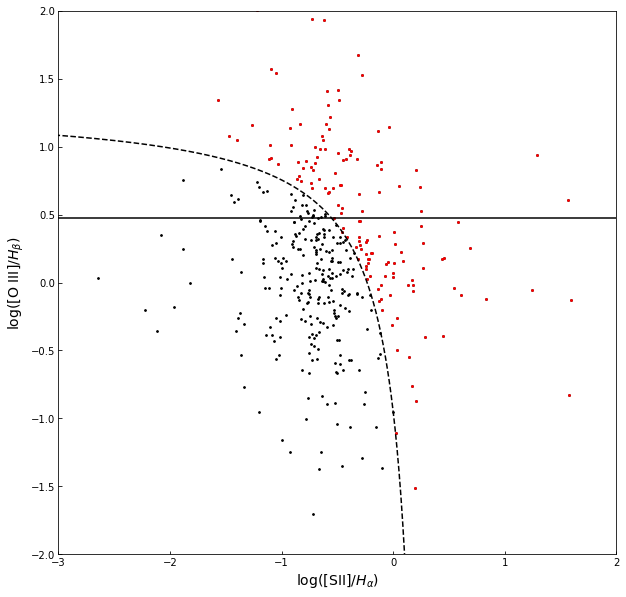

In [101]:
plt.figure(figsize=(10,10))
plt.scatter(np.log10(SHa),np.log10(OHb),c='black',s=3)
plt.scatter(np.log10(SHa[AGNSII]),np.log10(OHb[AGNSII]),c='red',s=3)

plt.xlabel('log([SII]/$H_{α}$)',fontsize=14)
plt.ylabel('log([O III]/$H_{β}$)',fontsize=14)

plt.plot(xxxx,agndefSII(xxxx),c='black',ls='--')

plt.tick_params(axis='both',direction='in')
plt.xlim(-3,2)
plt.ylim(-2,2)
plt.axhline(y=np.log10(3),c='black')

plt.show()

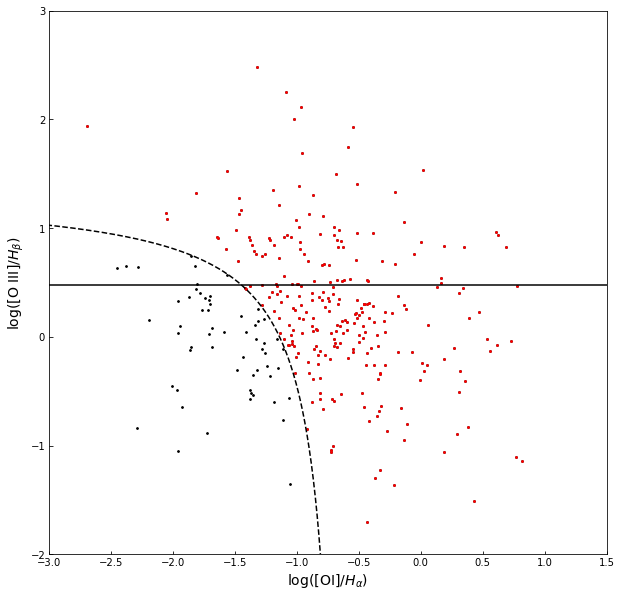

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(np.log10(OiHa),np.log10(OHb2),c='black',s=3)
plt.scatter(np.log10(OiHa[AGNOI]),np.log10(OHb2[AGNOI]),c='red',s=3)


plt.xlabel('log([OI]/$H_{α}$)',fontsize=14)
plt.ylabel('log([O III]/$H_{β}$)',fontsize=14)


plt.plot(xxxx2,agndefOI(xxxx2),c='black',ls='--')
plt.axhline(y=np.log10(3),c='black')
plt.tick_params(axis='both',direction='in')
plt.xlim(-3,1.5)
plt.ylim(-2,3)
plt.show()

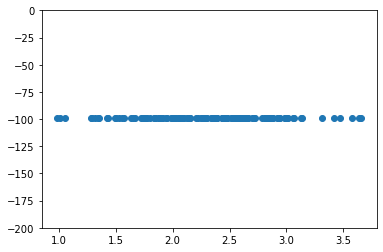

In [107]:
plt.figure()
plt.scatter(np.log10(OIII[AGNsamp]),Hd[AGNsamp])
plt.ylim(-200,0)
plt.show()